In [1]:
from sklearn import model_selection, datasets

import numpy as np

In [2]:
iris = datasets.load_iris()


In [3]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3)

In [4]:
print(len(train_data), len(test_data))

105 45


In [8]:
print(train_data[:5])

[[6.  2.2 5.  1.5]
 [7.2 3.2 6.  1.8]
 [6.  3.  4.8 1.8]
 [6.7 3.3 5.7 2.1]
 [5.7 4.4 1.5 0.4]]


In [9]:
print(train_labels[:5])

[2 2 2 2 0]


## KFold

In [13]:
kf = model_selection.KFold(n_splits = 5)
for train_indices, test_indices in kf.split(iris.target):
    print(train_indices, test_indices)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [14]:
kf = model_selection.KFold(n_splits = 5, shuffle=True)
for train_indices, test_indices in kf.split(iris.target):
    print(train_indices, test_indices)

[  0   1   2   3   4   5   7   9  10  11  12  15  17  18  19  21  22  23
  26  27  28  29  31  33  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  56  58  59  61  63  65  66  67  68  69
  70  71  72  73  74  75  77  78  79  81  82  83  84  86  87  88  89  90
  91  92  93  94  95  98  99 100 101 102 103 104 105 106 107 108 109 110
 112 113 114 115 116 117 118 119 122 123 124 126 127 128 130 131 133 134
 135 136 137 138 139 141 144 145 146 147 148 149] [  6   8  13  14  16  20  24  25  30  32  34  55  57  60  62  64  76  80
  85  96  97 111 120 121 125 129 132 140 142 143]
[  1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  22  23  24  25  26  27  28  29  30  32  34  35  36  37  38  39  40
  42  43  45  46  47  48  49  51  52  55  56  57  58  59  60  62  63  64
  66  67  69  70  71  72  73  75  76  77  78  79  80  81  83  84  85  87
  88  89  90  91  92  93  94  95  96  97  99 100 101 102 103 107 108 110
 111 112 113 114 116 118

## StratifiedKFold

In [26]:
X = range(0, 10)
y = np.array([0] * 5 + [1] * 5)
print(y)

skf = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
for train_indices, test_indices in skf.split(X, y):
    print(train_indices, test_indices)

[0 0 0 0 0 1 1 1 1 1]
[0 2 3 4 6 7 8 9] [1 5]
[0 1 3 4 5 6 8 9] [2 7]
[1 2 3 4 5 7 8 9] [0 6]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 5 6 7 9] [4 8]


In [28]:
target = np.array([0, 1] * 5)
print(target)

skf = model_selection.StratifiedKFold(n_splits = 5,shuffle = True)
for train_indices, test_indices in skf.split(X, target):
    print(train_indices, test_indices)

[0 1 0 1 0 1 0 1 0 1]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 3 4 5 7 8] [6 9]
[2 3 4 5 6 7 8 9] [0 1]
[0 1 2 3 4 6 7 9] [5 8]


## ShuffleSplit

In [29]:
ss = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2)

for train_indices, test_indices in ss.split(X):
    print(train_indices, test_indices)

[9 4 7 0 3 1 5 6] [2 8]
[0 5 4 9 8 7 2 6] [3 1]
[2 8 7 3 0 9 1 5] [4 6]
[6 3 2 5 1 7 8 9] [4 0]
[3 7 2 1 8 6 4 9] [5 0]
[3 4 9 5 2 0 8 1] [6 7]
[4 3 6 2 7 1 9 5] [0 8]
[9 7 3 5 0 2 8 6] [4 1]
[5 2 1 7 0 3 9 4] [8 6]
[3 4 0 6 7 1 8 5] [9 2]


## StratifiedShuffleSplit

In [30]:
target = np.array([0] * 5 + [1] * 5)
print(target)

sss = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = 0.2)
for train_indices, test_indices in sss.split(X, target):
    print(train_indices, test_indices)

[0 0 0 0 0 1 1 1 1 1]
[1 0 9 7 5 2 6 4] [8 3]
[7 4 5 2 0 6 9 1] [8 3]
[6 9 5 0 4 1 8 2] [3 7]
[7 4 9 1 5 8 3 2] [6 0]
[5 8 2 9 4 1 7 0] [6 3]


## Leave-One-Out

In [31]:
loo = model_selection.LeaveOneOut()

for train_indices, test_index in loo.split(X):
    print(train_indices, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


## sklearn.linear_model

In [32]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

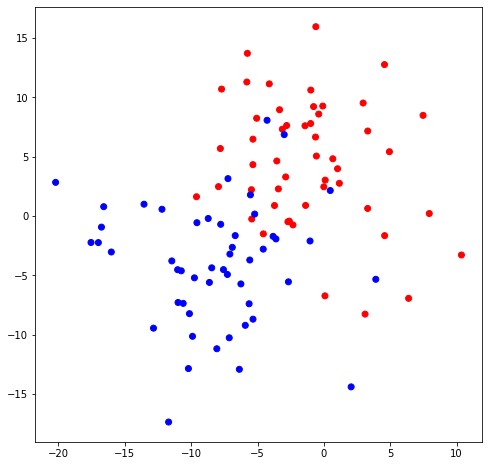

In [58]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [59]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

## Линейная классификация

### RidgeClassifier

In [60]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [61]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [62]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [63]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [64]:
print(ridge_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [65]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [66]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [67]:
ridge_classifier.intercept_ 

array([-0.31250723])

### LogisticRegression

In [68]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [69]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(random_state=1)

In [70]:
lr_predictions = log_regressor.predict(test_data)

In [80]:
#оценивает вероятность отнесения к одному из классов
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [81]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [82]:
print(lr_predictions)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [83]:
print(lr_proba_predictions)

[[9.99254667e-01 7.45333217e-04]
 [4.08279523e-01 5.91720477e-01]
 [4.90541791e-01 5.09458209e-01]
 [3.78296027e-03 9.96217040e-01]
 [7.32221196e-01 2.67778804e-01]
 [2.44262899e-01 7.55737101e-01]
 [9.93761113e-01 6.23888724e-03]
 [9.78405579e-01 2.15944205e-02]
 [9.55344987e-01 4.46550128e-02]
 [1.68318566e-01 8.31681434e-01]
 [9.20548027e-01 7.94519726e-02]
 [8.49635842e-03 9.91503642e-01]
 [8.42172474e-01 1.57827526e-01]
 [4.78103481e-02 9.52189652e-01]
 [4.16878377e-03 9.95831216e-01]
 [7.76668489e-04 9.99223332e-01]
 [2.05937909e-01 7.94062091e-01]
 [9.31195721e-01 6.88042793e-02]
 [2.41180236e-01 7.58819764e-01]
 [8.27655095e-04 9.99172345e-01]
 [8.91142562e-02 9.10885744e-01]
 [9.95944524e-01 4.05547579e-03]
 [9.84077857e-01 1.59221428e-02]
 [3.02681109e-01 6.97318891e-01]
 [1.47440544e-03 9.98525595e-01]
 [7.78506108e-03 9.92214939e-01]
 [2.89544877e-01 7.10455123e-01]
 [8.84591004e-01 1.15408996e-01]
 [9.92724199e-01 7.27580141e-03]
 [3.34985738e-03 9.96650143e-01]]


In [84]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8


In [85]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.8666666666666667


## Оценка качества по cross-validation

### cross_val_score

In [107]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [101]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [102]:
lr_scoring

array([0.8, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [108]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


In [104]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


### cross_val_score с заданными scorer и cv_strategy

In [109]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [110]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])

20

In [111]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [112]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [113]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.059535236998305825


In [114]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.06137317546507322


## sklearn.linear_model

## Линейная регрессия

### Генерация данных

In [124]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

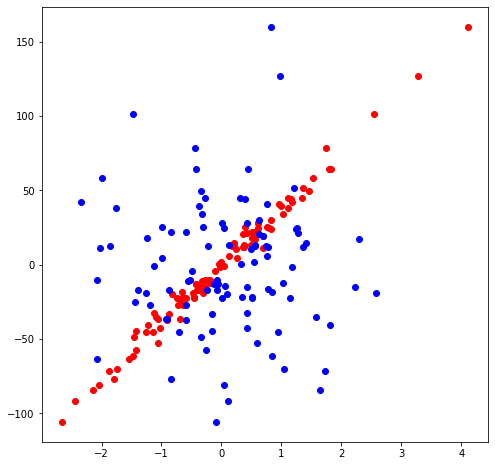

In [125]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [126]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

### LinearRegression

In [127]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [128]:
metrics.mean_absolute_error(test_labels, predictions)

4.235925682206841

In [129]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [130]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [131]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [132]:
linear_regressor.coef_

array([38.16199158,  0.45322877])

In [133]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.6594985868170746

In [134]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [135]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.16*x1 + 0.45*x2 + -0.66


## Lasso

In [136]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [137]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666398, std: 1.0170354384993348


In [138]:
print(lasso_regressor.coef_)

[37.46290744  0.        ]


In [139]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [140]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.46*x1 + 0.00*x2
